In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pynvel

+ rebuilding C:\workspace\pysftools\pynvel
+ successfully rebuilt


In [2]:
volume_info = dict(
  DF = {'vol_eq':'F00FW2W202', 'form_class':None, 'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
  WH = {'vol_eq':'F00FW2W263', 'form_class':None, 'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
  RC = {'vol_eq':'F00FW2W242', 'form_class':None, 'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
  RA = {'vol_eq':'B00BEHW351', 'form_class':73,   'dbh_range':range(1, 81, 1),  'top_dib_1':6.0, 'spp_grp':'hardwood'},
  SS = {'vol_eq':'B00BEHW098', 'form_class':73,   'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
  BM = {'vol_eq':'B00BEHW998', 'form_class':76.9, 'dbh_range':range(1, 81, 1),  'top_dib_1':6.0, 'spp_grp':'hardwood'},
  NF = {'vol_eq':'B00BEHW022', 'form_class':75.9, 'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
  WF = {'vol_eq':'B00BEHW015', 'form_class':75.9, 'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
  CX = {'vol_eq':'F00FW2W202', 'form_class':None, 'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
  HX = {'vol_eq':'B00BEHW998', 'form_class':70,   'dbh_range':range(1, 81, 1),  'top_dib_1':6.0, 'spp_grp':'hardwood'},
  MA = {'vol_eq':'B00BEHW998', 'form_class':70,   'dbh_range':range(1, 81, 1),  'top_dib_1':6.0, 'spp_grp':'hardwood'},
  CA = {'vol_eq':'B00BEHW998', 'form_class':70,   'dbh_range':range(1, 81, 1),  'top_dib_1':6.0, 'spp_grp':'hardwood'},
  XX = {'vol_eq':'F00FW2W202', 'form_class':None, 'dbh_range':range(1, 121, 1), 'top_dib_1':5.0, 'spp_grp':'conifer'},
)

mrule = {
      'evod': 2,'opt': 23,'maxlen': 40.0,'minlen': 12.0,'minlent': 12.0,'merchl': 20.0
      ,'mtopp': 5.0,'mtops': 2.0,'stump': 1.0,'trim': 1.0,'btr': 0.0,'dbtbh': 0.0,'minbfd': 8.0,'cor': 'Y'
    }

In [3]:
spp = 'DF'
vol_eq = 'B00BEHW206'
# vol_eq = 'F00FW3W202'

mrule['maxlen'] = 32
mrule['mtopp'] = 5.0
# mrule['btr'] = 92.0
_mrule = pynvel.init_merchrule(**mrule)

# vc = pynvel.VolumeCalculator(
#         merch_rule=_mrule, volume_eq=vol_eq
#         , cruise_type='c'
#         , calc_products=False
#       )

dbh = 18
tot_ht = 120.0
fc = 80
stem_ht = np.array([17.3,32.6])

dib = np.array([pynvel.calc_dib(
  volume_eq=vol_eq, dbh_ob=dbh, total_ht=tot_ht,
  form_class=fc,
  stem_ht=h
) for h in stem_ht])

exp_dib = dbh * (fc/100.0)

print(dbh, tot_ht, fc, stem_ht, dib.round(3), round(exp_dib,3))

18 120.0 80 [17.3 32.6] [14.026 13.154] 14.4


In [54]:
fia_eq = pynvel.get_equation(98, 'PN', 6, '12', fia=True)
fvs_eq = pynvel.get_equation(98, 'PN', 6, '12', fia=False)
fvs_eq = 'B00BEHW098'

print(fia_eq, fvs_eq)

632TRFW098 B00BEHW098


In [55]:
@np.vectorize
def wykoff_logistic(dbh, b1, b2):
  ht = 4.5 + np.exp(b1 + b2 / (dbh + 1.0))
  return ht

In [56]:
ht_coeffs = {
  'ACMA3': np.array([ 4.72200278, -5.97284535]),
  'ALRU2': np.array([ 4.88331859, -8.24406172]),
  'PSME': np.array([  5.39360625, -13.14138279]),
  'TSHE': np.array([  5.30151427, -13.64775124]),
  'ALL': np.array([  5.3359538 , -13.07112882])
}

In [57]:
dbh = np.arange(8,50)
ht = wykoff_logistic(dbh, *ht_coeffs['ALL'])

632TRFW098 B00BEHW098


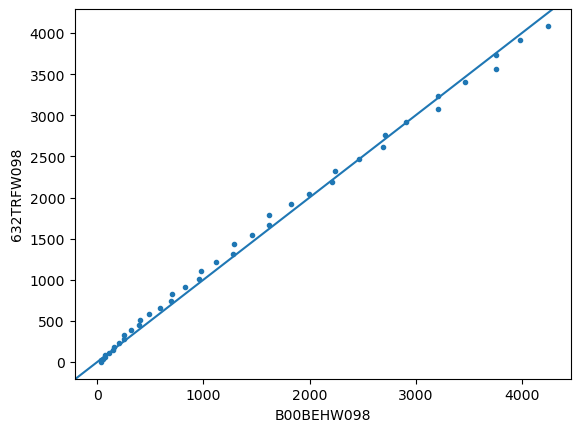

In [61]:
mrule = {
      'evod': 2,'opt': 23,'maxlen': 32.0,'minlen': 12.0,'minlent': 12.0,'merchl': 20.0
      ,'mtopp': 5.0,'mtops': 2.0,'stump': 1.0,'trim': 1.0,'btr': 0.0,'dbtbh': 0.0,'minbfd': 8.0,'cor': 'Y'
    }

_mrule = pynvel.init_merchrule(**mrule)

vc = pynvel.VolumeCalculator(
  merch_rule=_mrule, volume_eq=fia_eq
  , cruise_type='c'
  , calc_products=False
)

fia_vol = []
for d,h in zip(dbh,ht):
  vc.calc(
    dbh_ob=d, total_ht=h, form_class=0
  )
  fia_vol.append(vc.volume['bdft_gross_prim'])

# FVS Default
vc = pynvel.VolumeCalculator(
  merch_rule=_mrule, volume_eq=fvs_eq
  , cruise_type='c'
  , calc_products=False
)

fvs_vol = []
for d,h in zip(dbh,ht):
  vc.calc(
    dbh_ob=d, total_ht=h, form_class=69
  )
  fvs_vol.append(vc.volume['bdft_gross_prim'])

print(fia_eq, fvs_eq)

plt.plot(fvs_vol, fia_vol, '.')
ax = plt.gca()
ax.set_xlabel(fvs_eq)
ax.set_ylabel(fia_eq)
ax.axline((0,0), slope=1)

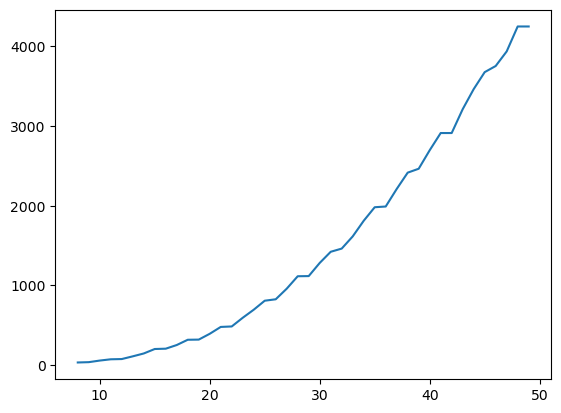

In [59]:
plt.plot(dbh, fvs_vol)